<a href="https://colab.research.google.com/github/HemaGarima/Machine_Learning_coursera/blob/main/Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Q-Learning - Lunar Lander

## Import Packages

In [7]:
pip install pyvirtualdisplay

In [8]:
import time
from collections import deque , namedtuple

import gym
import numpy as np
import PIL.Image
import tensorflow as tf
import utils

from pyvirtualdisplay import Display
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Input
from tensorflow.keras.losses import MSE
from tensorflow.keras.optimizers import Adam

In [11]:
# Set up a virtual display to render the Lunar Lander environment
Display(visible = 0 , size = (840 , 480)).start();

# Set the random seed for Tensorflow
tf.random.set_seed(utils.SEED)

## Hyperparameters

In [12]:
MEMORY_SIZE = 100_000 # size of memory buffer
GAMMA = 0.995 # discount factor
ALPHA = 1e-3 # Learning rate
NUM_STEPS_FOR_UPDATE = 4 # perform a learning update every C time steps

## The Lunar Lander Environment

1. Action Space


*   Do nothing
*   Fire right engine
*   Fire main engine
*   Fire left engine





1.   Do nothing = 0
2.   Fire right engine = 1
3.   Fire main engine = 2
4.   Fire left engine = 3


## Load the Environment

In [14]:
pip install Box2D

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 31.7 MB/s eta 0:00:00


In [15]:
env = gym.make('LunarLander-v2')

<frozen importlib._bootstrap>:241: DeprecationWarning: builtin type SwigPyPacked has no __module__ attribute
<frozen importlib._bootstrap>:241: DeprecationWarning: builtin type SwigPyObject has no __module__ attribute
<frozen importlib._bootstrap>:241: DeprecationWarning: builtin type swigvarlink has no __module__ attribute
/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


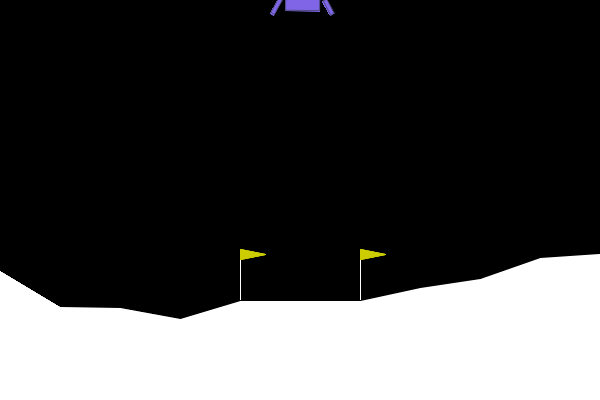

In [17]:
env.reset()
PIL.Image.fromarray(env.render(mode = 'rgb_array'))

In [18]:
state_size = env.observation_space.shape
num_actions = env.action_space.n
print('State Shape:' , state_size)
print('Number of actions:' , num_actions)

State Shape: (8,)
Number of actions: 4


## Interacting with the Gym Environment